In [1]:
import netCDF4 as nc
import pandas as pd

In [2]:
ds = nc.Dataset('data2.nc4')

In [3]:
print(ds.variables.keys())

dict_keys(['sounding_id_idx', 'longitude', 'latitude', 'time', 'epoch_dimension', 'sounding_id', 'levels', 'bands', 'vertices', 'footprints', 'date', 'solar_zenith_angle', 'sensor_zenith_angle', 'xco2_quality_flag', 'xco2_qf_bitflag', 'xco2_qf_simple_bitflag', 'source_files', 'file_index', 'vertex_latitude', 'vertex_longitude', 'xco2', 'xco2_uncertainty', 'xco2_apriori', 'pressure_levels', 'co2_profile_apriori', 'xco2_averaging_kernel', 'pressure_weight'])


In [4]:
['longitude','latitude','date','xco2_quality_flag','xco2_qf_bitflag','xco2_qf_simple_bitflag','xco2','xco2_uncertainty','xco2_averaging_kernel']


['longitude',
 'latitude',
 'date',
 'xco2_quality_flag',
 'xco2_qf_bitflag',
 'xco2_qf_simple_bitflag',
 'xco2',
 'xco2_uncertainty',
 'xco2_averaging_kernel']

In [57]:
longitude = ds.variables['longitude'][:]
latitude = ds.variables['latitude'][:]
date = ds.variables['date'][:]
xco2_uncertainty = ds.variables['xco2_uncertainty'][:]
xco2_apriori = ds.variables['xco2_apriori'][:]
vertex_latitude = ds.variables['vertex_latitude'][:]
vertex_longitude = ds.variables['vertex_longitude'][:]
xco2 = ds.variables['xco2'][:]


In [58]:
list_of_tuples = list(zip(latitude, longitude, xco2,date,xco2_uncertainty,vertex_latitude,vertex_longitude))
list2 = list(zip(latitude, longitude, xco2,date,xco2_uncertainty,vertex_latitude,vertex_longitude))

In [59]:
list_of_tuples

[(-84.39751,
  -58.438766,
  399.34525,
  masked_array(data=[2016,    1,    1,    1,   12,    6,  700],
               mask=False,
         fill_value=999999,
              dtype=int16),
  0.54631144,
  masked_array(data=[-84.38245 , -84.389496, -84.41265 , -84.40552 ],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  masked_array(data=[-58.360474, -58.53    , -58.517944, -58.346954],
               mask=False,
         fill_value=1e+20,
              dtype=float32)),
 (-84.40473,
  -58.61123,
  402.78195,
  masked_array(data=[2016,    1,    1,    1,   12,    7,    0],
               mask=False,
         fill_value=999999,
              dtype=int16),
  0.5429777,
  masked_array(data=[-84.3895 , -84.39641, -84.41966, -84.41267],
               mask=False,
         fill_value=1e+20,
              dtype=float32),
  masked_array(data=[-58.530334, -58.700623, -58.690155, -58.51828 ],
               mask=False,
         fill_value=1e+20,
              dty

In [60]:
ds1 = pd.DataFrame(list_of_tuples, columns=['latitude', 'longitude', 'xco2','date','xco2_uncertainty','vertex_latitude','vertex_longitude'],)
ds1.head()

,latitude,longitude,xco2,date,xco2_uncertainty,vertex_latitude,vertex_longitude
0,-84.397507,-58.438766,399.345245,"[2016, 1, 1, 1, 12, 6, 700]",0.546311,"[-84.38245, -84.389496, -84.41265, -84.40552]","[-58.360474, -58.53, -58.517944, -58.346954]"
1,-84.404732,-58.611229,402.781952,"[2016, 1, 1, 1, 12, 7, 0]",0.542978,"[-84.3895, -84.39641, -84.41966, -84.41267]","[-58.530334, -58.700623, -58.690155, -58.51828]"
2,-84.604561,-60.857105,390.640717,"[2016, 1, 1, 1, 12, 11, 300]",0.514839,"[-84.58989, -84.59618, -84.619225, -84.61294]","[-60.767426, -60.94522, -60.9469, -60.76837]"
3,-84.610741,-61.034943,387.779419,"[2016, 1, 1, 1, 12, 11, 700]",0.455861,"[-84.5961, -84.60236, -84.625404, -84.61914]","[-60.944702, -61.12314, -61.12567, -60.94638]"
4,-84.581253,-62.828384,394.969635,"[2016, 1, 1, 1, 12, 15, 0]",0.403939,"[-84.56684, -84.5726, -84.595375, -84.58963]","[-62.733276, -62.914795, -62.921173, -62.73877]"


In [98]:
plot_tuple = list(zip(latitude, longitude, xco2))
plot_tuple[:4]

[(-84.39751, -58.438766, 399.34525),
 (-84.40473, -58.61123, 402.78195),
 (-84.60456, -60.857105, 390.64072),
 (-84.61074, -61.034943, 387.77942)]

In [99]:
plot_ds = pd.DataFrame(plot_tuple, columns=['latitude', 'longitude', 'xco2'])
plot_ds.head()

,latitude,longitude,xco2
0,-84.397507,-58.438766,399.345245
1,-84.404732,-58.611229,402.781952
2,-84.604561,-60.857105,390.640717
3,-84.610741,-61.034943,387.779419
4,-84.581253,-62.828384,394.969635


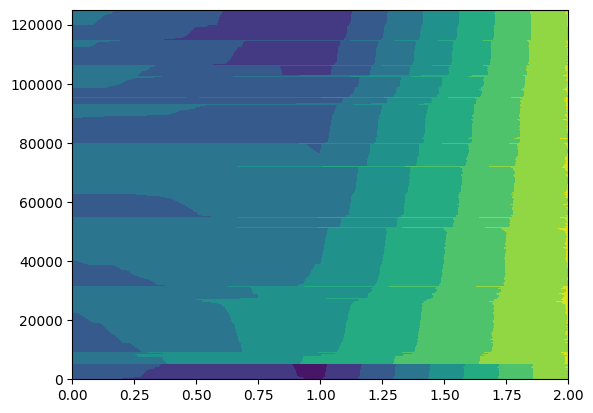

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
cs = plt.contourf(plot_ds)

In [61]:
ds2 = []

In [62]:
k=0
cnt20 = 0
for i in range(len(ds1)):
    arr = ds1['date'][i]
    if ds1['date'][i][3] == k and cnt20 < 20:
        ds2.append(ds1.loc[i])
        cnt20 += 1
    if cnt20 == 20 or ds1['date'][i][3] > k:
        k += 1
        cnt20 = 0

In [63]:
ds2 = pd.DataFrame(ds2)
ds2

,latitude,longitude,xco2,date,xco2_uncertainty,vertex_latitude,vertex_longitude
1,-84.404732,-58.611229,402.781952,"[2016, 1, 1, 1, 12, 7, 0]",0.542978,"[-84.3895, -84.39641, -84.41966, -84.41267]","[-58.530334, -58.700623, -58.690155, -58.51828]"
2,-84.604561,-60.857105,390.640717,"[2016, 1, 1, 1, 12, 11, 300]",0.514839,"[-84.58989, -84.59618, -84.619225, -84.61294]","[-60.767426, -60.94522, -60.9469, -60.76837]"
3,-84.610741,-61.034943,387.779419,"[2016, 1, 1, 1, 12, 11, 700]",0.455861,"[-84.5961, -84.60236, -84.625404, -84.61914]","[-60.944702, -61.12314, -61.12567, -60.94638]"
4,-84.581253,-62.828384,394.969635,"[2016, 1, 1, 1, 12, 15, 0]",0.403939,"[-84.56684, -84.5726, -84.595375, -84.58963]","[-62.733276, -62.914795, -62.921173, -62.73877]"
5,-84.592667,-63.194363,402.410522,"[2016, 1, 1, 1, 12, 15, 700]",0.470817,"[-84.57859, -84.584236, -84.606995, -84.6011]","[-63.100586, -63.283203, -63.291077, -63.10489]"
...,...,...,...,...,...,...,...
119505,-6.060260,-142.975601,400.054688,"[2016, 1, 1, 23, 3, 40, 0]",0.396244,"[-6.0640655, -6.0454097, -6.0564895, -6.075146]","[-142.97441, -142.97845, -142.97678, -142.97273]"
119506,-6.071045,-142.973923,399.614471,"[2016, 1, 1, 23, 3, 40, 0]",0.391145,"[-6.0749, -6.0562425, -6.067222, -6.0858817]","[-142.97273, -142.97678, -142.97511, -142.97108]"
119507,-6.092536,-142.970886,400.838928,"[2016, 1, 1, 23, 3, 40, 0]",0.369524,"[-6.0964584, -6.077797, -6.088646, -6.107309]","[-142.96968, -142.97371, -142.97208, -142.96805]"
119508,-6.103337,-142.969498,400.977600,"[2016, 1, 1, 23, 3, 40, 0]",0.367982,"[-6.107319, -6.088656, -6.099388, -6.118053]","[-142.96829, -142.97232, -142.9707, -142.96667]"


In [64]:
ds2.reset_index(inplace = True, drop = True)
ds2

,latitude,longitude,xco2,date,xco2_uncertainty,vertex_latitude,vertex_longitude
0,-84.404732,-58.611229,402.781952,"[2016, 1, 1, 1, 12, 7, 0]",0.542978,"[-84.3895, -84.39641, -84.41966, -84.41267]","[-58.530334, -58.700623, -58.690155, -58.51828]"
1,-84.604561,-60.857105,390.640717,"[2016, 1, 1, 1, 12, 11, 300]",0.514839,"[-84.58989, -84.59618, -84.619225, -84.61294]","[-60.767426, -60.94522, -60.9469, -60.76837]"
2,-84.610741,-61.034943,387.779419,"[2016, 1, 1, 1, 12, 11, 700]",0.455861,"[-84.5961, -84.60236, -84.625404, -84.61914]","[-60.944702, -61.12314, -61.12567, -60.94638]"
3,-84.581253,-62.828384,394.969635,"[2016, 1, 1, 1, 12, 15, 0]",0.403939,"[-84.56684, -84.5726, -84.595375, -84.58963]","[-62.733276, -62.914795, -62.921173, -62.73877]"
4,-84.592667,-63.194363,402.410522,"[2016, 1, 1, 1, 12, 15, 700]",0.470817,"[-84.57859, -84.584236, -84.606995, -84.6011]","[-63.100586, -63.283203, -63.291077, -63.10489]"
...,...,...,...,...,...,...,...
446,-6.060260,-142.975601,400.054688,"[2016, 1, 1, 23, 3, 40, 0]",0.396244,"[-6.0640655, -6.0454097, -6.0564895, -6.075146]","[-142.97441, -142.97845, -142.97678, -142.97273]"
447,-6.071045,-142.973923,399.614471,"[2016, 1, 1, 23, 3, 40, 0]",0.391145,"[-6.0749, -6.0562425, -6.067222, -6.0858817]","[-142.97273, -142.97678, -142.97511, -142.97108]"
448,-6.092536,-142.970886,400.838928,"[2016, 1, 1, 23, 3, 40, 0]",0.369524,"[-6.0964584, -6.077797, -6.088646, -6.107309]","[-142.96968, -142.97371, -142.97208, -142.96805]"
449,-6.103337,-142.969498,400.977600,"[2016, 1, 1, 23, 3, 40, 0]",0.367982,"[-6.107319, -6.088656, -6.099388, -6.118053]","[-142.96829, -142.97232, -142.9707, -142.96667]"


In [47]:
gosat = pd.read_csv('oco2_processed\ds_gosat.csv')
gosat

,latitude,longitude,latitudeOriginal,longitudeOriginal,xco2,external error,smoothing error,interference error,retrieval noise,scanID,timeStamp (YY-MM-DD hh:mm:ss)
0,-44.988514,177.81488,-44.988514,177.81488,399.23282,-9999.0,0.793073,0.385816,1.149969,b'F160101002502423801',16-01-01 00:25:02
1,-44.982890,177.81520,-44.982890,177.81520,399.23930,-9999.0,0.675786,0.289862,1.037871,b'F160101002507423801',16-01-01 00:25:07
2,-47.462000,176.90233,-47.462000,176.90233,395.11590,-9999.0,0.783970,0.391290,1.142727,b'F160101002548423801',16-01-01 00:25:48
3,-17.032183,158.27000,-17.032183,158.27000,393.02795,-9999.0,0.693490,0.300061,1.099909,b'F160101015518013301',16-01-01 01:55:18
4,-17.028898,158.26990,-17.028898,158.26990,395.75775,-9999.0,0.676782,0.282090,1.085563,b'F160101015523013301',16-01-01 01:55:23
...,...,...,...,...,...,...,...,...,...,...,...
324,-27.497082,-160.71132,-27.497082,-160.71132,397.63123,-9999.0,0.512843,0.206043,0.895647,b'F160101231440403501',16-01-01 23:14:40
325,-27.493680,-160.71121,-27.493680,-160.71121,397.21520,-9999.0,0.505547,0.186905,0.872522,b'F160101231445403501',16-01-01 23:14:45
326,-27.488056,-160.71152,-27.488056,-160.71152,397.30542,-9999.0,0.513889,0.180527,0.873733,b'F160101231449403501',16-01-01 23:14:49
327,-39.514053,-167.26985,-39.514053,-167.26985,394.12006,-9999.0,0.711427,0.284026,1.091184,b'F160101231826403701',16-01-01 23:18:26


In [48]:
gosat.describe()

,latitude,longitude,latitudeOriginal,longitudeOriginal,xco2,external error,smoothing error,interference error,retrieval noise
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.0,329.000000,329.000000,329.000000
mean,6.371463,24.855450,6.371221,24.855473,399.883246,-9999.0,0.537264,0.254024,0.927003
std,27.664190,75.161773,27.663993,75.161858,2.863051,0.0,0.109224,0.096870,0.184039
min,-47.462000,-167.271700,-47.462000,-167.271700,390.927150,-9999.0,0.398248,0.096925,0.684050
25%,-22.453644,-4.886815,-22.453644,-4.888153,397.761170,-9999.0,0.449306,0.185169,0.789705
50%,20.460413,22.813766,20.460733,22.813805,400.217770,-9999.0,0.505015,0.245559,0.895647
75%,28.381105,75.841380,28.380919,75.842260,401.786650,-9999.0,0.606894,0.311371,1.048001
max,43.445590,177.815200,43.445570,177.815200,407.845150,-9999.0,1.095665,0.742993,2.719275


In [35]:
import math

In [37]:
# 0.184039/math.sqrt(328)

0.010161853813644341

In [49]:
# gosat['uncertainity'] = [i*0.010161853813644341 for i in gosat['retrieval noise']]

In [50]:
gosat = gosat.drop(['longitudeOriginal', 'external error', 'latitudeOriginal','timeStamp (YY-MM-DD hh:mm:ss)', 'smoothing error', 'interference error', 'retrieval noise', 'scanID'], axis='columns')

In [51]:
gosat

,latitude,longitude,xco2,uncertainity
0,-44.988514,177.81488,399.23282,0.011686
1,-44.982890,177.81520,399.23930,0.010547
2,-47.462000,176.90233,395.11590,0.011612
3,-17.032183,158.27000,393.02795,0.011177
4,-17.028898,158.26990,395.75775,0.011031
...,...,...,...,...
324,-27.497082,-160.71132,397.63123,0.009101
325,-27.493680,-160.71121,397.21520,0.008866
326,-27.488056,-160.71152,397.30542,0.008879
327,-39.514053,-167.26985,394.12006,0.011088


In [16]:
for i in range(len(ds2)):
    arr = ds2['vertex_latitude'][i]
    arr2 = ds2['vertex_longitude'][i]
    x = ds2['latitude'][i]
    y = ds2['longitude'][i]
    for j in range(len(arr)):
        # print(i,x,arr[j] ,(arr[j]+x)/2 )
        # print(i,y,arr2[j],(arr2[j]+y)/2)
        ds2['vertex_latitude'][i][j] = (arr[j]+ds2['latitude'][j])/2
        ds2['vertex_longitude'][i][j] = (arr2[j]+ds2['longitude'][j])/2

In [45]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [14]:
tupl

((-84.3895, -58.530334),
 (-84.39641, -58.700623),
 (-84.41966, -58.690155),
 (-84.41267, -58.51828))

In [52]:
x, y = gosat['latitude'][1], gosat['longitude'][1]
point = Point(x, y)
tupl = tuple(zip(ds2['vertex_latitude'][1], ds2['vertex_longitude'][1]))
polygon = Polygon(tupl)
polygon.contains(point)

False

In [25]:
# from numba import jit, cuda
# @jit(target_backend='cuda') 
# def avgco2(data):
#     for i in range(len(data)):
#         avg = 0
#         cnt =0
#         for j in range(len(data)):
#             x, y = data['latitude'][j], data['longitude'][j]
#             point = Point(x, y)
#             tupl = tuple(zip(data['vertex_latitude'][i], data['vertex_longitude'][i]))
#             polygon = Polygon(tupl)
#             if polygon.contains(point):
#                 if data['xco2_uncertainty'][j]<0.65:
#                     avg += data['xco2']
#                     cnt+=1
#         if cnt == 0:
#             avg = 0
#         else:
#             avg = avg/cnt
#         # print("for ith center ",i," no of intersection = ",cnt)
#         data['xco2'] = avg

#     return data

In [65]:
ds3 = ds2.copy()

In [67]:
for i in range(len(ds2)):
    avg = ds2['xco2'][i]
    cnt =0
    for j in range(len(gosat)):
        x, y = gosat['latitude'][j], gosat['longitude'][j]
        point = Point(x, y)
        tupl = tuple(zip(ds2['vertex_latitude'][i], ds2['vertex_longitude'][i]))
        polygon = Polygon(tupl)
        if polygon.contains(point):
            # if ds2['xco2_uncertainty'][j]<0.65:
                avg += gosat['xco2']
                cnt+=1
    if cnt==0:
        avg = avg
    else:          
        avg = avg/cnt
        print("for ith center ",i," no of intersection = ",cnt)
    ds2['xco2'] = avg

In [68]:
ds2

,latitude,longitude,xco2,date,xco2_uncertainty,vertex_latitude,vertex_longitude
0,-84.404732,-58.611229,402.781952,"[2016, 1, 1, 1, 12, 7, 0]",0.542978,"[-84.3895, -84.39641, -84.41966, -84.41267]","[-58.530334, -58.700623, -58.690155, -58.51828]"
1,-84.604561,-60.857105,402.781952,"[2016, 1, 1, 1, 12, 11, 300]",0.514839,"[-84.58989, -84.59618, -84.619225, -84.61294]","[-60.767426, -60.94522, -60.9469, -60.76837]"
2,-84.610741,-61.034943,402.781952,"[2016, 1, 1, 1, 12, 11, 700]",0.455861,"[-84.5961, -84.60236, -84.625404, -84.61914]","[-60.944702, -61.12314, -61.12567, -60.94638]"
3,-84.581253,-62.828384,402.781952,"[2016, 1, 1, 1, 12, 15, 0]",0.403939,"[-84.56684, -84.5726, -84.595375, -84.58963]","[-62.733276, -62.914795, -62.921173, -62.73877]"
4,-84.592667,-63.194363,402.781952,"[2016, 1, 1, 1, 12, 15, 700]",0.470817,"[-84.57859, -84.584236, -84.606995, -84.6011]","[-63.100586, -63.283203, -63.291077, -63.10489]"
...,...,...,...,...,...,...,...
446,-6.060260,-142.975601,402.781952,"[2016, 1, 1, 23, 3, 40, 0]",0.396244,"[-6.0640655, -6.0454097, -6.0564895, -6.075146]","[-142.97441, -142.97845, -142.97678, -142.97273]"
447,-6.071045,-142.973923,402.781952,"[2016, 1, 1, 23, 3, 40, 0]",0.391145,"[-6.0749, -6.0562425, -6.067222, -6.0858817]","[-142.97273, -142.97678, -142.97511, -142.97108]"
448,-6.092536,-142.970886,402.781952,"[2016, 1, 1, 23, 3, 40, 0]",0.369524,"[-6.0964584, -6.077797, -6.088646, -6.107309]","[-142.96968, -142.97371, -142.97208, -142.96805]"
449,-6.103337,-142.969498,402.781952,"[2016, 1, 1, 23, 3, 40, 0]",0.367982,"[-6.107319, -6.088656, -6.099388, -6.118053]","[-142.96829, -142.97232, -142.9707, -142.96667]"


In [69]:
ds4 = ds3[['latitude', 'longitude', 'xco2']]
ds4

,latitude,longitude,xco2
0,-84.404732,-58.611229,402.781952
1,-84.604561,-60.857105,390.640717
2,-84.610741,-61.034943,387.779419
3,-84.581253,-62.828384,394.969635
4,-84.592667,-63.194363,402.410522
...,...,...,...
446,-6.060260,-142.975601,400.054688
447,-6.071045,-142.973923,399.614471
448,-6.092536,-142.970886,400.838928
449,-6.103337,-142.969498,400.977600


In [71]:
ds5 = gosat.drop('uncertainity', axis='columns')
ds5

,latitude,longitude,xco2
0,-44.988514,177.81488,399.23282
1,-44.982890,177.81520,399.23930
2,-47.462000,176.90233,395.11590
3,-17.032183,158.27000,393.02795
4,-17.028898,158.26990,395.75775
...,...,...,...
324,-27.497082,-160.71132,397.63123
325,-27.493680,-160.71121,397.21520
326,-27.488056,-160.71152,397.30542
327,-39.514053,-167.26985,394.12006


In [72]:
frames = [ds4, ds5]
result = pd.concat(frames)
result.reset_index(inplace=True)

,latitude,longitude,xco2
0,-84.404732,-58.611229,402.781952
1,-84.604561,-60.857105,390.640717
2,-84.610741,-61.034943,387.779419
3,-84.581253,-62.828384,394.969635
4,-84.592667,-63.194363,402.410522
...,...,...,...
324,-27.497082,-160.711320,397.631230
325,-27.493680,-160.711210,397.215200
326,-27.488056,-160.711520,397.305420
327,-39.514053,-167.269850,394.120060


In [77]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt

In [83]:
import numpy as np

In [78]:
train , test = train_test_split(result, test_size = 0.3)

In [86]:
x_train = np.array(train[['latitude', 'longitude']])
y_train = np.array(train['xco2'])
x_test = np.array(test[['latitude', 'longitude']])
y_test = np.array(test['xco2'])

In [88]:
K = 2

In [89]:
model = neighbors.KNeighborsRegressor(n_neighbors = K)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [93]:
pred = model.predict(x_test)

In [94]:
error = sqrt(mean_squared_error(y_test,pred))

In [97]:
rmse_val = [] 
K=0
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    # print('RMSE value for k= ' , K , 'is:', error)

In [95]:
error

3.6843293806343484

In [ ]:
df_1day = []
for i in range(len(ds1)):
    x = ds1['date'][i]
    if x[0] == 2016 and x[1] == 1 and x[2] == 1:
        df_1day.append(list(ds1.loc[i]))
    else:
        break